### Import libraries

In [4]:
import obspy as obs
import numpy as np
import matplotlib.pyplot as plt

# from andbro__querrySeismoData import __querrySeismoData
# from andbro__get_timeaxis import __get_timeaxis

### Configurations

In [15]:
config = {}

config['tbeg'] = obs.UTCDateTime("2021-09-27 06:17")
config['tend'] = obs.UTCDateTime("2021-09-27 06:45")

config['sta'] = ['GELB','GRMB','BIB','TON', 'ALFT', 'FFB1', 'FFB2', 'FFB3', 'FUR']
config['net'] = ['BW','BW','BW','BW','BW','BW','BW','BW','GR']
config['loc'] = ''
config['cha'] = '?HZ'

config['repository'] = "jane"

config['event'] = {'t0':'2021-09-27 06:17', 'lat':35.252 , 'lon':25.259}

### GELB -> fails

In [16]:
from obspy.clients.fdsn import RoutingClient, Client

route1 = RoutingClient("eida-routing")
route2 = Client(base_url="http://jane")
route3 = Client("LMU")


for route in [route1, route2, route3]:
    try:
        inv = route.get_stations(network=config.get("net")[0], 
                                 station=config.get("sta")[0], 
                                 location=config.get("loc"), 
                                 channel=config.get("cha"),
                                 starttime=config.get("tbeg"),
                                 endtime=config.get("tend"),
                                 level="channel",
                                );
    except:
        print("ERROR! ")
        
inv, inv.get_contents()

(Inventory created at 2021-10-08T10:48:01.032523Z
	Sending institution: SeisComP (GOF)
	Contains:
		Networks (1):
			BW
		Stations (1):
			BW.GELB (Gelbenholzen)
		Channels (1):
			BW.GELB..HHZ,
 {'networks': ['BW'],
  'stations': ['BW.GELB (Gelbenholzen)'],
  'channels': ['BW.GELB..HHZ']})

### GRMB -> no channel info

In [19]:
from obspy.clients.fdsn import RoutingClient, Client

route1 = RoutingClient("eida-routing")
route2 = Client(base_url="http://jane")
route3 = Client("LMU")


for route in [route1, route2, route3]:
    try:
        inv = route.get_stations(network=config.get("net")[1], 
                                 station=config.get("sta")[1], 
                                 location=config.get("loc"), 
                                 channel=config.get("cha"),
                                 starttime=config.get("tbeg"),
                                 endtime=config.get("tend"),
                                 level="response",
                                );
    except:
        print("ERROR! ")
        
inv, inv.get_contents()

(Inventory created at 2021-10-08T10:48:30.922780Z
	Sending institution: SeisComP (GOF)
	Contains:
		Networks (1):
			BW
		Stations (1):
			BW.GRMB (Germannsberg)
		Channels (1):
			BW.GRMB..HHZ,
 {'networks': ['BW'],
  'stations': ['BW.GRMB (Germannsberg)'],
  'channels': ['BW.GRMB..HHZ']})

## BIB -> works

In [18]:
from obspy.clients.fdsn import RoutingClient, Client

route1 = RoutingClient("eida-routing")
route2 = Client(base_url="http://jane")
route3 = Client("LMU")


for route in [route1, route2, route3]:
    try:
        inv = route.get_stations(network=config.get("net")[2], 
                                 station=config.get("sta")[2], 
                                 location=config.get("loc"), 
                                 channel=config.get("cha"),
                                 starttime=config.get("tbeg"),
                                 endtime=config.get("tend"),
                                 level="channel",
                                );
    except:
        print("ERROR! ")

inv, inv.get_contents()

(Inventory created at 2021-10-08T10:48:10.044194Z
	Sending institution: SeisComP (GOF)
	Contains:
		Networks (1):
			BW
		Stations (1):
			BW.BIB (Biburg, Scheune)
		Channels (2):
			BW.BIB..BHZ, BW.BIB..HHZ,
 {'networks': ['BW'],
  'stations': ['BW.BIB (Biburg, Scheune)'],
  'channels': ['BW.BIB..BHZ', 'BW.BIB..HHZ']})

## Waveforms BIB

In [51]:
config['tbeg'] = obs.UTCDateTime("2021-08-30 00:00")
config['tend'] = obs.UTCDateTime("2021-09-02 23:00")

In [52]:
try:
    st0 = route.get_waveforms(network=config.get("net")[2], 
                             station=config.get("sta")[2], 
                             location=config.get("loc"), 
                             channel=config.get("cha"),
                             starttime=config.get("tbeg"),
                             endtime=config.get("tend"),
                            );
except:
    print("ERROR! ")

In [55]:
st = st0.copy()


# st.detrend('demean')
# st.filter('bandpass', freqmin=0.001, freqmax=0.1, corners=4, zerophase=True)

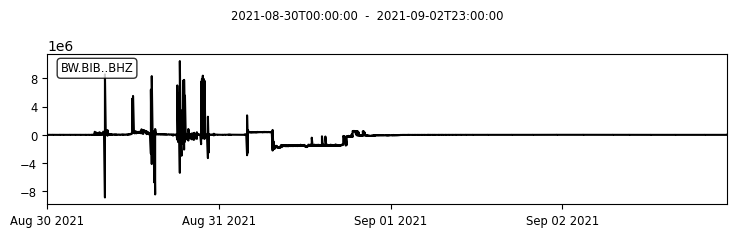

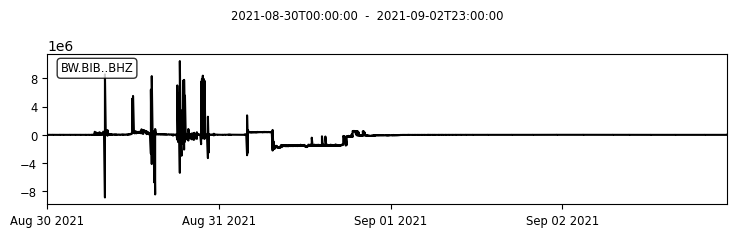

In [56]:
st.plot()

In [10]:
import obspy as obs
st = obs.read('/bay200/mseed_online/archive/2021/BW/GRMB/BHZ.D/'+'BW.GRMB..BHZ.D.2021.281')

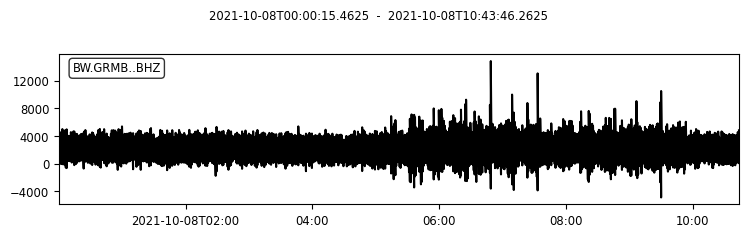

In [11]:
st.plot();

In [12]:
st

1 Trace(s) in Stream:
BW.GRMB..BHZ | 2021-10-08T00:00:15.462500Z - 2021-10-08T10:43:46.262500Z | 20.0 Hz, 772217 samples

In [9]:
r1 = ((384e6-6371e3)**2)
r2 = ((384e6)**2)

G = 6.674e-11
mm = 7.34e22

G*mm*(1/r1 - 1/r2)

1.1304209913163209e-06